## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

### Выгрузка и ознакомление с данными

Прочтем и выведем на экран первые пять строчек каждой из таблиц и их размерности

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
display(train.head(), test.head(), full.head())
train.shape, test.shape, full.shape

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


((14149, 87), (5290, 53), (19439, 87))

Необходимо проверить, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Также, найдем MAE между расчётами и значением признака.

Напишем функцию для расчета эффективности и сохраним наши расчеты

In [3]:
def recovery(train):
    C = train['rougher.output.concentrate_au']
    F = train['rougher.input.feed_au']
    T = train['rougher.output.tail_au']
    rec = (C*(F-T))/(F*(C-T)) * 100
    return rec

recovery_estimated = train.apply(recovery, axis=1)

MAE между расчетами и значением признака

In [4]:
mean_squared_error(recovery_estimated, train['rougher.output.recovery'])

2.1207417887083724e-28

**Вывод:** MAE практически нулевая. Это говорит о том, что эффективность обогащения рассчитана правильно.

Проанализируем признаки, недоступные в тестовой выборке

In [5]:
set(train.columns) - set(test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Признаки, недоступные в тестовой выборке относятся к параметрам продукта (иными словами выходным параметрам) и расчетным характеристикам

### Предобработка данных

Переведем дату в соответствующий тип

In [6]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d')

Необходимо избавиться от пропусков. Так как соседние по времени параметры часто похожи, а данные отсортированны по времени (столбец date), то можно заполнить пропуски с помощью fillna c параметром method='ffill'

In [7]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')
full = full.fillna(method='ffill')

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

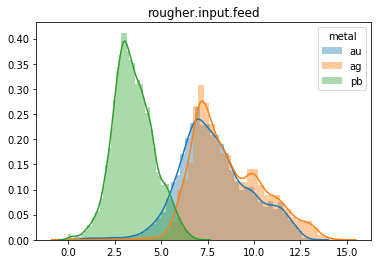

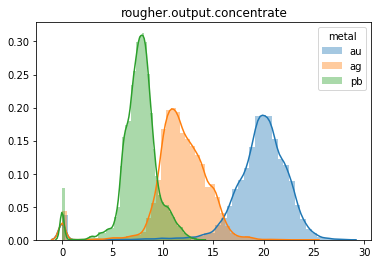

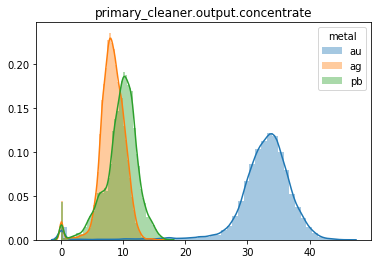

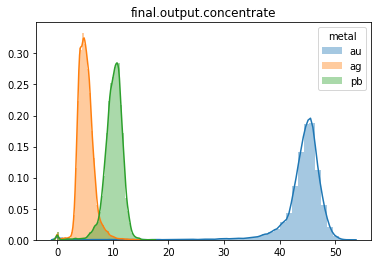

In [8]:
processes=['rougher.input.feed', 'rougher.output.concentrate',
         'primary_cleaner.output.concentrate', 'final.output.concentrate']
metals=['au', 'ag', 'pb']
for process in processes:
    for metal in metals:
        sns.distplot(train[process+'_'+metal], label=metal)
        plt.legend(title='metal')
        plt.title(process)
        plt.xlabel('')
    plt.show()

**Вывод:** Из графиков видно, что в процессе очистки концентрация золота возрастает. Концентрация дргуих металлов меняется незначительно

### Распределения размеров гранул сырья на обучающей и тестовой выборках

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках для двух стадий: флотации и первичной очистки

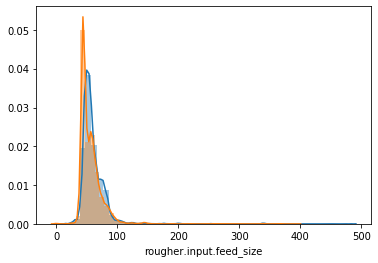

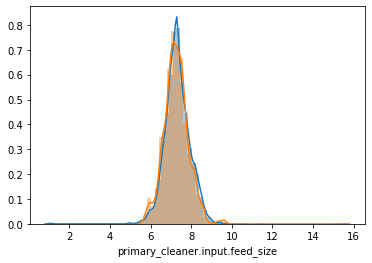

In [9]:
sns.distplot(train['rougher.input.feed_size'])
sns.distplot(test['rougher.input.feed_size'])
plt.show()
sns.distplot(train['primary_cleaner.input.feed_size'])
sns.distplot(test['primary_cleaner.input.feed_size'])

**Вывод:** Из графиков видно, что распределения размеров гранул сырья на обучающей и тестовой выборках практически не отличаются

### Суммарная концентрация всех веществ

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

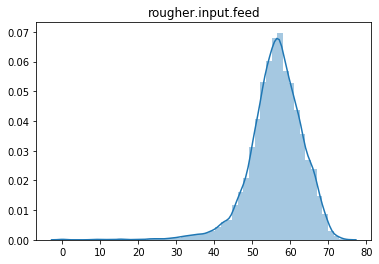

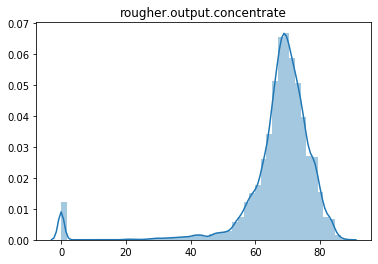

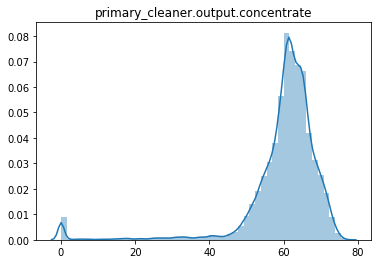

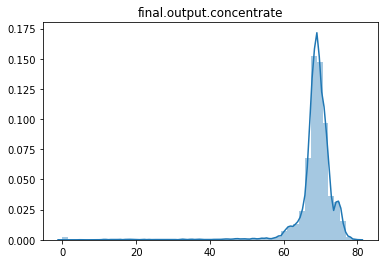

In [10]:
metals.append('sol')
for process in processes:
    sum_concentration = 0
    for metal in metals:
        sum_concentration += train[process+'_'+metal]
    sns.distplot(sum_concentration)
    plt.xlabel('')
    plt.title(process)
    plt.show()

Наблюдаются нулевые аномалии в суммарных концентрациях. От них необходимо избавиться, тк в "суммарной руде" (золото+серебро+свинец) что-то из этого списка должно присутствовать. Наличие нуля в суммарной концентрации может свидетельствовать о неточности измерений.

In [11]:
train['sum_concentration'] = sum_concentration
train = train.query('sum_concentration!=0')

## Модель

Необходимо построить модель для предсказания коэффициента восстановления золота из золотосодержащей руды

Посмотрим еще раз на признаки, недоступные в тестовой выборке (без учета таргетов)

In [12]:
drop_col = set(train.drop(['final.output.recovery', 'rougher.output.recovery'],
                          axis=1).columns)-set(test.columns)
drop_col

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleane

На этих признаках необходимо обучать модель, тк в проде доступны будут только они. Для расчета метрик необходимо, чтобы в тестовой выборке были таргеты. Возьмем их из общей таблицы (full)

In [13]:
train = train.drop(drop_col, axis=1)
date = test['date']
test['final.output.recovery'] = full.query('date in @date')['final.output.recovery'].reset_index(drop=True)
test['rougher.output.recovery'] = full.query('date in @date')['rougher.output.recovery'].reset_index(drop=True)

Напишем функцию для расчета итоговой sMAPE

In [14]:
def final_sMAPE(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final, N):
    smape_rougher = (abs(y_true_rougher-y_pred_rougher)/(abs(y_true_rougher+y_pred_rougher)/2)).sum()/N
    smape_final = (abs(y_true_final-y_pred_final)/(abs(y_true_final+y_pred_final)/2)).sum()/N
    return (0.25*smape_rougher + 0.75*smape_final)*100

Разделим данные на признаки и целевые признаки

In [15]:
features_train = train.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
target_rougher_train = train['rougher.output.recovery']
target_final_train = train['final.output.recovery']

features_test = test.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
target_rougher_test = test['rougher.output.recovery']
target_final_test = test['final.output.recovery']

### RandomForestRegressor

Подберем лучшие значения гиперпараметров модели (для чернового концентрата) и обучим ее.

In [16]:
%%time
model = RandomForestRegressor()
parametrs = {'n_estimators': range(10,51,10), 'max_depth': range(1,13, 2)}
grid_rougher = GridSearchCV(model, parametrs, cv=5)
grid_rougher.fit(features_train, target_rougher_train)
grid_rougher.best_params_

CPU times: user 17min 6s, sys: 765 ms, total: 17min 7s
Wall time: 17min 7s


{'max_depth': 5, 'n_estimators': 10}

Получим предсказания для rougher

In [17]:
predict_rougher = grid_rougher.predict(features_test)

Подберем лучшие значения гиперпараметров модели (для финального концентрата) и обучим ее.

In [18]:
%%time
grid_final =  GridSearchCV(model, parametrs, cv=5)
grid_final.fit(features_train, target_final_train)
grid_final.best_params_

CPU times: user 17min 30s, sys: 648 ms, total: 17min 30s
Wall time: 17min 31s


{'max_depth': 5, 'n_estimators': 30}

Получим предсказания для final

In [19]:
predict_final = grid_final.predict(features_test)

Рассчитаем итоговую sMAPE для предсказаний моделей случайного леса

In [20]:
final_sMAPE(target_rougher_test, predict_rougher, target_final_test, predict_final, len(test))

10.067026894805007

### LinearRegression

Рассмотрим LinearRegression для чернового концентрата. Оценим ее качество кросс-валидацией

In [21]:
model = LinearRegression()
scores = cross_val_score(model, features_train, target_rougher_train, cv=5)
scores.mean()

-0.4931182168529412

Обучим модель

In [22]:
model = LinearRegression()
model.fit(features_train, target_rougher_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Получим предсказания для rougher

In [23]:
predict_rougher_2 = model.predict(features_test)

Рассмотрим LinearRegression для финального концентрата. Оценим ее качество кросс-валидацией

In [24]:
model = LinearRegression()
scores = cross_val_score(model, features_train, target_final_train, cv=5)
scores.mean()

-0.16605156602498955

Обучим модель

In [25]:
model = LinearRegression()
model.fit(features_train, target_final_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Получим предсказания для final

In [26]:
predict_final_2 = model.predict(features_test)

Рассчитаем итоговую sMAPE для предсказаний моделей линейной регрессии

In [28]:
final_sMAPE(target_rougher_test, predict_rougher_2, target_final_test, predict_final_2, len(test))

9.894008661300994

## Вывод

Результаты исследования приведены в таблице

In [30]:
pd.DataFrame({'model': ['RandomForestRegressor', ' LinearRegression'], 'sMAPE': [10.067, 9.894]})

,model,sMAPE
0,RandomForestRegressor,10.067
1,LinearRegression,9.894


Для предсказания коэффициента восстановления золота из золотосодержащей руды использовались модели случайного леса и линейная регрессия. По результатам видно, что обе модели дают хорошее значение метрики sMAPE, но линейная регрессия показывает немного лучший результат. К тому же, на обучение случайного леса уходит намного больше времени, чем у линейной регрессии.